In [1]:
import actionet
import actionet.preprocessing
import actionet.tools
import scipy
import numpy as np
import scanpy as sc
import anndata
import pandas as pd
from anndata import AnnData

In [2]:
import matplotlib.pyplot as plt

In [3]:
adata = anndata.read_h5ad("../data/test_adata_post_annot.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 6790 × 14409
    obs: 'Barcode', 'CellLabel', 'assigned_archetype', 'annot', 'annot_conf'
    var: 'ENSEMBL', 'Gene', 'Chromosome', 'Biotype'
    uns: 'action_params', 'log1p'
    obsm: 'C_merged', 'C_stacked', 'H_merged', 'H_stacked', 'action', 'action_B', 'annot_enrichment', 'archetype_footprint', 'umap'
    varm: 'action_A', 'action_V'
    layers: 'logcounts'
    obsp: 'actionet'

In [9]:
actionet.compute_coreness(adata, inplace=False)

array([ 95,  71,  98, ...,  75, 114, 133], shape=(6790,), dtype=int32)

In [8]:
adata.obs['coreness']

0        95
1        71
2        98
3       167
4       112
       ... 
6785     29
6786    111
6787     75
6788    114
6789    133
Name: coreness, Length: 6790, dtype: int32

In [21]:
# clusters = actionet.cluster_network(adata, objective_function="modularity", resolution_parameter=0.05, attr_out="leiden", inplace=False)
# np.sort(pd.Series(clusters).unique())
sc.tl.leiden(adata, resolution=1, obsp="actionet")

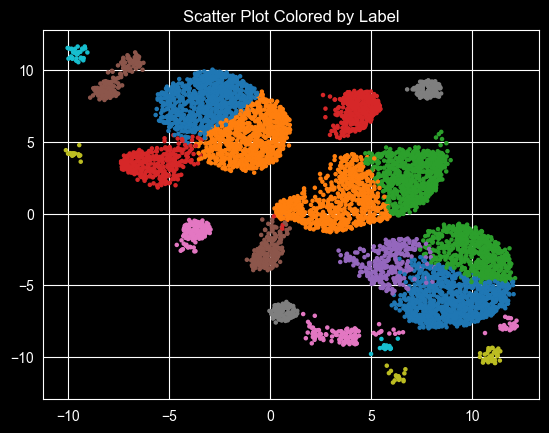

In [22]:
labels = adata.obs['leiden'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['umap'][:, 0],
    y=adata.obsm['umap'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    s = 5
)
# plt.xlabel('X')
# plt.ylabel('Y')
plt.title('Scatter Plot Colored by Label')
# plt.colorbar(label='CellLabel')
plt.show()

In [23]:
adata.write_h5ad("../data/test_adata_post_leiden.h5ad")

In [ ]:
compute_co